## Daniel Barella
## 9/20/25

# 📘 Day 21: Introduction to Machine Learning

## 🧠 Concepts Learned

- Machine Learning (ML): Teaching computers to learn patterns from data instead of hardcoding rules.

- Types of ML:

    - Supervised Learning → Data has labels (e.g., predicting house prices).

    - Unsupervised Learning → Data has no labels (e.g., customer segmentation).

- ML Workflow:

1. Data Collection

2. Data Cleaning & Preprocessing

3. Train/Test Split

4. Model Training

5. Model Evaluation

6. Tuning & Deployment

# 🛠️ Practice Work
📥 Load Example Dataset

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 📊 Train/Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 8), (4128, 8))

### 🤖 Train First ML Model (Linear Regression)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -37.0232777060642
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


### 📈 Model Evaluation

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.5558915986952437
R² Score: 0.5757877060324512


## 🎯 Mini Project: Predict California Housing Prices

Objective: Build a regression model to predict housing prices in California.

- Load dataset, split into training/testing.

- Train Linear Regression model.

- Evaluate using MSE + R² Score.

- Identify which features (e.g., median income, rooms) are most predictive.

In [6]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(feature_importance)


      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
1    HouseAge     0.009724
5    AveOccup    -0.003526
4  Population    -0.000002


Here’s what it means:

MedInc (0.448675) → Median income is a strong positive predictor. Higher neighborhood income → higher house values.

AveBedrms (0.783145) → Average bedrooms per household has the strongest coefficient, but be careful: this can be a bit misleading because it’s strongly tied to AveRooms (multicollinearity). It doesn’t literally mean “more bedrooms = higher price” in isolation.

Longitude (-0.433708) & Latitude (-0.419792) → Location matters a lot. Since California is mapped west-to-east and north-to-south, these negative coefficients reflect geography: houses farther inland or north often cost less than coastal/SoCal properties.

AveRooms (-0.123323) → Average rooms per household shows a slight negative coefficient — again probably due to correlation with other features.

HouseAge (0.009724) → Slight positive effect, but not strong.

AveOccup (-0.003526) & Population (-0.000002) → Very small effects.

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train linear regression
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients in a DataFrame
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeffs)


      Feature  Coefficient
6    Latitude    -0.899886
7   Longitude    -0.870541
0      MedInc     0.829619
3   AveBedrms     0.305696
2    AveRooms    -0.265527
1    HouseAge     0.118752
5    AveOccup    -0.039326
4  Population    -0.004503


In [9]:
import matplotlib.pyplot as plt

# Match feature names with coefficients
coefficients = pd.Series(model.coef_, index=X.columns)

coefficients


MedInc        0.829619
HouseAge      0.118752
AveRooms     -0.265527
AveBedrms     0.305696
Population   -0.004503
AveOccup     -0.039326
Latitude     -0.899886
Longitude    -0.870541
dtype: float64

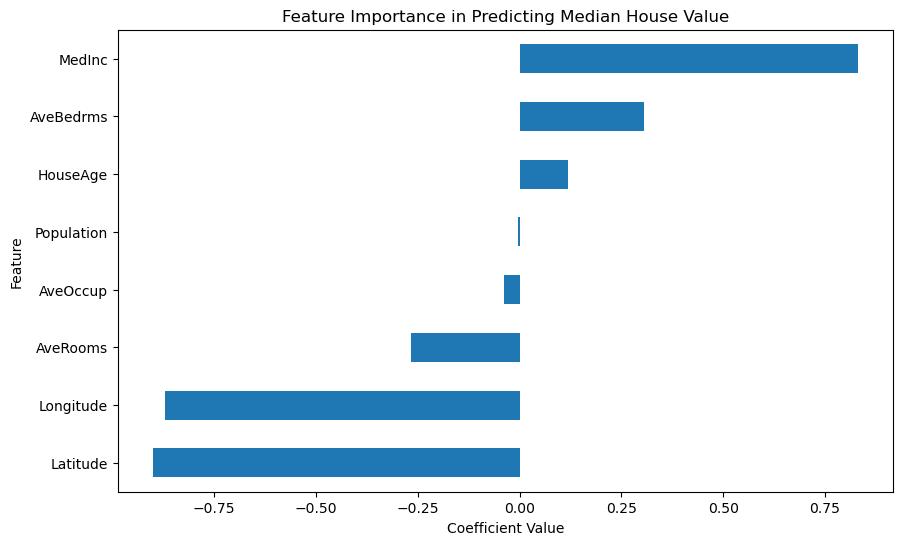

In [10]:
plt.figure(figsize=(10,6))
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Importance in Predicting Median House Value")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
